In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [6]:
#Read the dataset
blobs = pd.read_csv("./data/kmeans_blobs.csv")
colnames = list(blobs.columns[1:-1])
print(colnames)
blobs.head()

['x', 'y']


,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


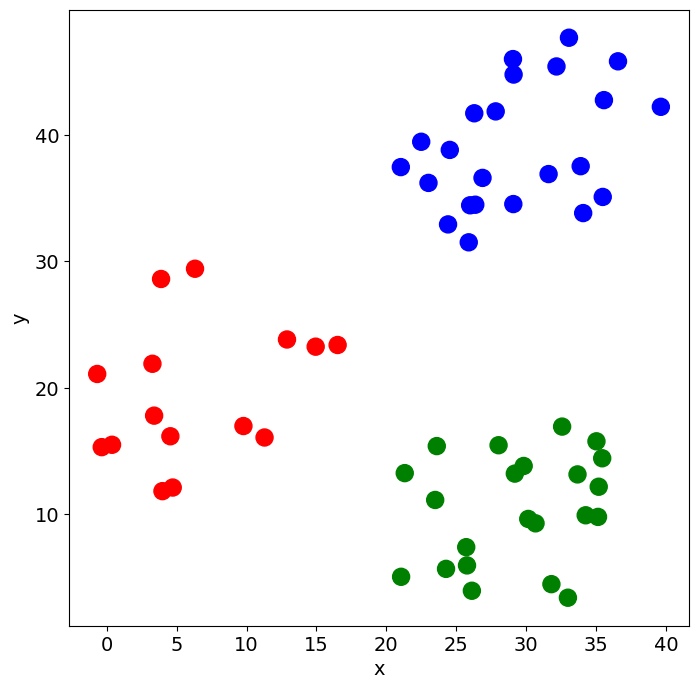

In [7]:
#Plot the dataset
customcmap = ListedColormap(["Red","Green","Blue"])
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x=blobs["x"],y=blobs["y"],s=150,c = blobs["cluster"].astype('category'),cmap = customcmap)
ax.set_xlabel(r"x",fontsize=14)
ax.set_ylabel(r"y",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [8]:
#Initiate k and the centroids
def initiate_centroids(k,dset):
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k = 3
df = blobs[['x','y']]
centroids = initiate_centroids(k,df)
centroids

,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.609


In [9]:
#Calculate the similarity value which is the euclidean distance
def rserr(a,b):
    return np.square(np.sum((a-b)**2))


In [10]:
#Write the centroid assignment 
def centroid_assignment(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        errors = np.array([])
        for centroid in range(k):
            err = rserr(centroids.iloc[centroid,:],dset.iloc[obs,:])
            errors = np.append(errors,err)
        
        nearest_centroid = np.where(errors==np.amin(errors))[0].tolist()[0]
        nearest_centroid_err = np.amin(errors)

        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_err)

    return assignation, assign_errors

In [11]:
#Add centroid information to dataset
df['centroid'],df['error'] = centroid_assignment(df,centroids)
df.head()

C:\Users\deyko\AppData\Local\Temp\ipykernel_27372\3130049455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'],df['error'] = centroid_assignment(df,centroids)


,x,y,centroid,error
0,24.412,32.932,0,0.000000
1,35.190,12.189,1,211534.211314
2,26.288,41.718,2,699.601495
3,0.376,15.506,0,776856.744109
4,26.116,3.963,1,576327.599678


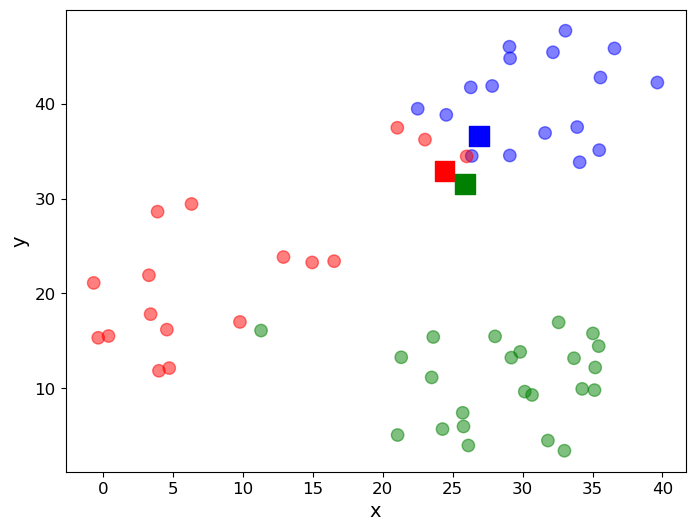

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
#The whole kmeans algorithm
def kmeans(dset, k=2, tol =1e-4):
    working_dset = dset.copy()
    err = []
    goahead = True
    j = 0
    centroids = initiate_centroids(k,working_dset)
    print(centroids)

    while(goahead):
        working_dset['centroid'], j_err = centroid_assignment(working_dset, centroids) 
        err.append(sum(j_err))
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1
    working_dset['centroid'], j_err = centroid_assignment(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

         x       y
0   24.412  32.932
5   25.893  31.515
36  26.878  36.609


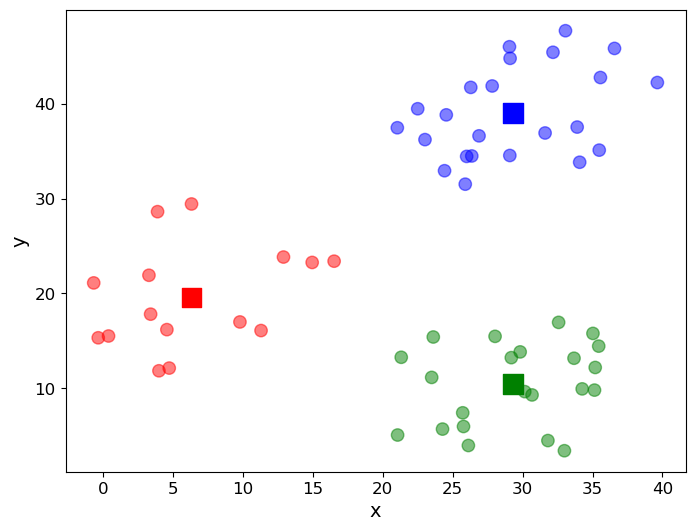

In [14]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['x','y']], 3)
df.head()

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()